In [2]:
import sys, os
import statsmodels as ss
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [3]:
np.random.seed(42)

time = np.arange(100)
stationary = np.random.normal(loc = 0, scale = 1.0, size = len(time))

In [4]:
def run_sequence_plot(x, y, title, xlabel = 'Time', ylabel = 'Series'):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha = 0.4)

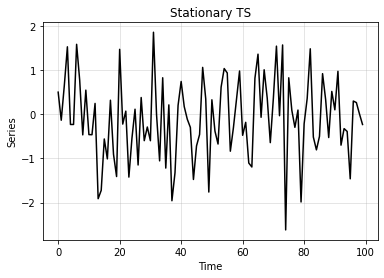

In [5]:
run_sequence_plot(time, stationary, 
                  title='Stationary TS')

In [6]:
seed = 3.14

lagged = np.empty_like(time, dtype='float') # create same shape and type array
for t in time:
    lagged[t] = seed + np.random.normal(loc = 0, scale = 2.5, size = 1)
    seed = lagged[t]

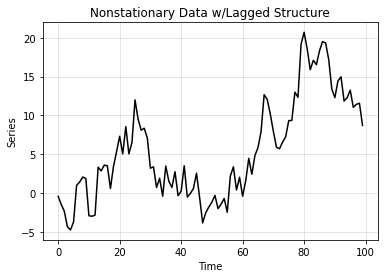

In [7]:
run_sequence_plot(time, lagged, title="Nonstationary Data w/Lagged Structure")

# **`Trend`**

In [8]:
trend = (time * 2.75) + stationary

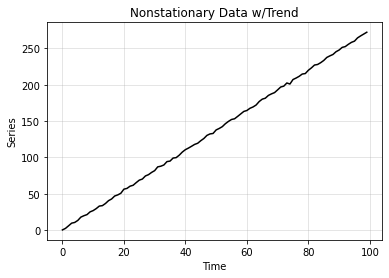

In [9]:
run_sequence_plot(time, trend, title='Nonstationary Data w/Trend')

# **`Heteroscedasticity`**

In [10]:
np.random.seed(42)

#data
level1 = np.random.normal(loc = 0.0, scale = 1.0, size = 50)
level2 = np.random.normal(loc = 0.0, scale = 10.0, size = 50)
heteroscedasticity = np.append(level1, level2)

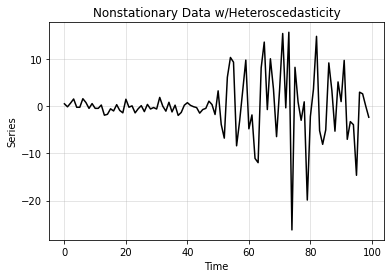

In [11]:
run_sequence_plot(time,
                  heteroscedasticity,
                  title = "Nonstationary Data w/Heteroscedasticity")

# **`Seasonality`**

In [12]:
seasonality = 10 + np.sin(time) * 10
seasonality

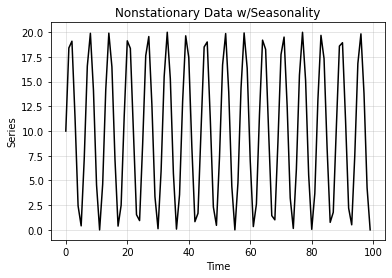

In [13]:
run_sequence_plot(time, seasonality, title = "Nonstationary Data w/Seasonality")

# **`Trend + Seasonality `**

In [14]:
trend_seasonality = trend + seasonality + stationary

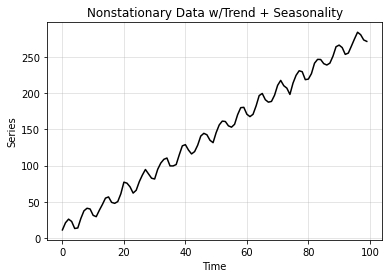

In [15]:
run_sequence_plot(time, trend_seasonality, title = "Nonstationary Data w/Trend + Seasonality")

In [16]:
mytime = np.arange(100)

In [17]:
mytime

In [18]:

# get data
path_to_file = "./"
dataset_SNS_1 = np.load(path_to_file + "dataset_SNS_1.npy")
dataset_SNS_2 = np.load(path_to_file + "dataset_SNS_2.npy")

In [19]:
def run_ts_plot(x, y, title , xlabel = 'Time', ylabel = 'Series'):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha = 0.3)

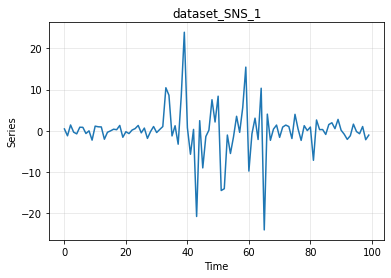

In [20]:
run_ts_plot(mytime, 
            dataset_SNS_1,
            title = "dataset_SNS_1")

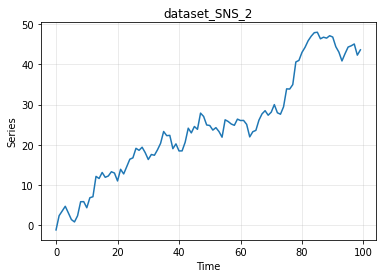

In [21]:
run_ts_plot(mytime,
            dataset_SNS_2,
            title = "dataset_SNS_2")

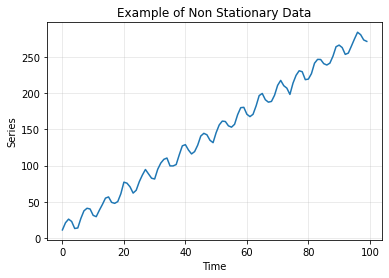

In [22]:
run_ts_plot(time, trend_seasonality,
            title = "Example of Non Stationary Data")

### Summary Statistics & Plots

In [23]:
chunks = np.split(trend, indices_or_sections = 10)

# **`Summary Stats `**

In [24]:
print(f'{"chunk"} | {"mean":<7} | {"variance":<19}')
print(f'{"-" * 26 }')
for i, chunk in enumerate(chunks, 1):
    print(f'{i} | {np.mean(chunk):.6} | {np.var(chunk):.6}')

chunk | mean    | variance           
--------------------------
1 | 12.8231 | 62.548
2 | 39.0843 | 60.8662
3 | 67.1532 | 58.7456
4 | 94.5649 | 57.2321
5 | 122.122 | 58.9505
6 | 150.074 | 65.1111
7 | 177.36 | 67.7091
8 | 204.827 | 54.8101
9 | 232.476 | 62.6766
10 | 259.726 | 61.6424


In [25]:
np.mean(chunks, axis=1)

In [26]:
np.var(chunks, axis=1)

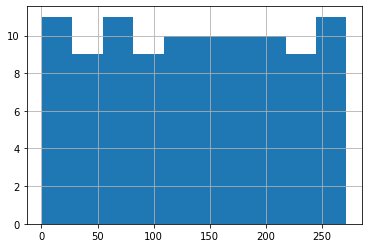

In [27]:
pd.Series(trend).hist()
plt.show()

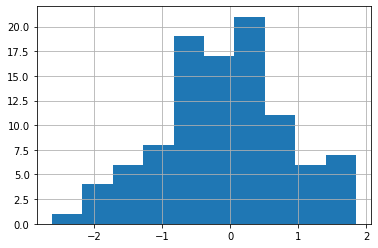

In [28]:
pd.Series(stationary).hist()
plt.show()

# **Stationary Data & Augmented Dickey-Fuller Test**

In [29]:
from statsmodels.tsa.stattools import adfuller
adf, p_value, usedlags, nobs, critical_values, icbest = adfuller(stationary)

### A brief discussion about the important outputs from the ADF test is in order. 

In [30]:
print(adf)

-10.084425913669714


First, **adf** is the value of the test statistic. The more negative the value, the more confident we can be that the series is stationary. Here we see a value of -10. That may not mean anything to you just yet but the **pvalue** should.

In [31]:
print(p_value)

1.1655044784188669e-17


Next, **pvalue** is interpreted like any p-value. Once we set a threshold, we can compare this p-value to that threshold. Either we reject or fail to reject the null. Here **pvalue** is very close to zero (~$10^{-17}$) so we reject the null that this data is nonstationary.

In [32]:
print(nobs)

99


The variable **nobs** is simply the number of observations in the time series, in this case 99.

In [33]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


Finally, the **critical_values** variable provides test statistic threholds for common significant levels. Here we see a test statistic of roughly -2.89 and lower is sufficient to reject the null using a significance level of 5%.

#### Trend Data & ADF
Now to run the ADF test on the *trend* data. 

In [34]:
adf, pvalue, usedlag, nobs, criticalvalues, icbest = adfuller(trend, regression='c')
print(f"\nADF: {adf}\nP-Value: {pvalue}")


ADF: 0.33188731231643004
P-Value: 0.9787610787258312


In [35]:
adf, pvalue, usedlag, nobs, criticalvalues, icbest = adfuller(lagged, regression='c')
print(f"\nADF: {adf}\nP-Value: {pvalue}")


ADF: -1.8975904890519297
P-Value: 0.33319546838684744


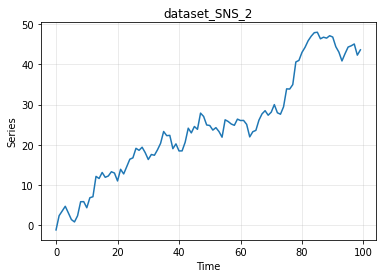

In [36]:
run_ts_plot(time, dataset_SNS_1, title='dataset_SNS_1')
plt.show()
run_ts_plot(time, dataset_SNS_2, title='dataset_SNS_2')

In [37]:
chunk1 = np.split(dataset_SNS_1, indices_or_sections=10)
chunk2 = np.split(dataset_SNS_2, indices_or_sections=10)

print(f'\nData Set Chunk1..\n\nMean:{np.mean(chunk1, axis=1)}\n\nVariance:{np.var(chunk1, axis=1)}')


Data Set Chunk1..

Mean:[-0.14368349  0.121089    0.04714784  4.92083495 -2.32626967 -0.3706503
 -1.95084875  0.34634898  0.30483126 -0.51907842]

Variance:[ 1.1064868   1.16521661  0.76635153 59.91993023 55.94682032 79.168351
 77.81561226  3.18839451  7.29302955  1.34694601]


In [38]:
print(f'\nData Set Chunk2..\n\nMean:{np.mean(chunk2, axis=1)}\n\nVariance:{np.var(chunk2, axis=1)}')


Data Set Chunk2..

Mean:[ 2.8186155  10.51083038 16.02252814 19.73251898 23.26775272 24.60790371
 25.54323527 32.73577811 46.28942898 43.77348672]

Variance:[ 4.50258195  9.30343813  7.51911006  4.97894604  9.42707844  1.77171835
  3.96080036 22.71299455  2.22467478  2.47819651]


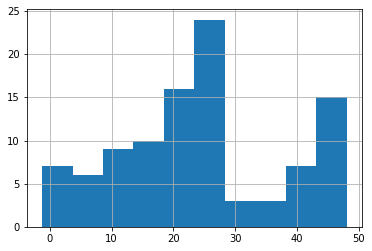

In [39]:
pd.Series(dataset_SNS_1).hist()
plt.show()
pd.Series(dataset_SNS_2).hist()
plt.show()

In [40]:
adf_1, pvalue_1, usedlag_, nobs_, criticalValues_, icbest_ = adfuller(dataset_SNS_1)
print("Dataset SNS_1\n")
print(f'ADF:{adf_1}\n')
print(f'P-Value:{pvalue_1}\n')
print(f'Critical Values:{criticalValues_}')

Dataset SNS_1

ADF:-3.0324159035016045

P-Value:0.03197606455861574

Critical Values:{'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}


In [41]:
adf_2, pvalue_2, usedlag_, nobs_, criticalValues_, icbest_ = adfuller(dataset_SNS_2)
print("Dataset SNS_2\n")
print(f'ADF:{adf_2}\n')
print(f'P-Value:{pvalue_2}\n')
print(f'Critical Values:{criticalValues_}')

Dataset SNS_2

ADF:-1.3222642986946496

P-Value:0.6189258221979334

Critical Values:{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


**Explanation:** We've seen before how ADF has trouble identifying heteroscedastic data so we have to consider all tools when it comes to dataset_SNS_1. Here, ADF is telling us the series is stationary, but that's clearly not the case. On the flip side, ADF says dataset_SNS_2 is nonstationary, as we can tell from the run-sequence plot. 

Therefore, both datasets are nonstationary and require transformation.

In [57]:
trend_seasonality

In [58]:
adf_b4, pvalue_b4, usedlag, nobs, critical_values_, icbest_ = adfuller(trend_seasonality)
print(f'\nADF:{adf_b4}\nP-Value:{pvalue_b4}')


ADF:0.29403605928892457
P-Value:0.9770692037868638


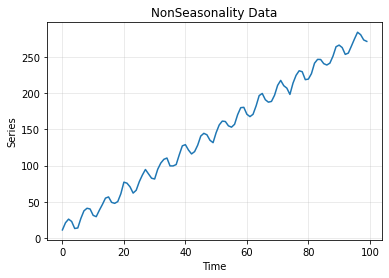

In [59]:
run_ts_plot(time, trend_seasonality, title='NonSeasonality Data')

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
ss_decompose = seasonal_decompose(trend_seasonality, model = 'additive', period = 42)
est_trend = ss_decompose.trend
est_seasonal = ss_decompose.seasonal
est_resid = ss_decompose.resid

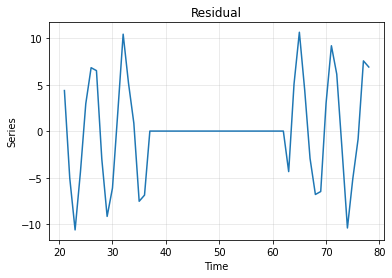

In [62]:
run_ts_plot(time, est_trend, title = 'Trend')
plt.show()
run_ts_plot(time, est_seasonal, title = 'Seasonal')
plt.show()
run_ts_plot(time, est_resid, title = 'Residual')
plt.show()

In [63]:
print(est_resid)

[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan   4.36899297  -5.04735004 -10.61516098  -4.38820676
   2.95147801   6.82718323   6.51137731  -2.98078551  -9.16333224
  -6.11322586   2.05475513  10.43054003   5.1717524    0.86304155
  -7.53646879  -6.87618808   0.0116876    0.0116876    0.0116876
   0.0116876    0.0116876    0.0116876    0.0116876    0.0116876
   0.0116876    0.0116876    0.0116876    0.0116876    0.0116876
   0.0116876    0.0116876    0.0116876    0.0116876    0.0116876
   0.0116876    0.0116876    0.0116876    0.0116876    0.0116876
   0.0116876    0.0116876    0.0116876   -4.34561776   5.07072525
  10.63853619   4.41158197  -2.9281028   -6.80380802  -6.4880021
   3.00416072   9.18670745   6.13660107  -2.03137992 -10.40716482
  -5.14837719  -

In [68]:
AdfAfter, PvalueAfter, UsedLag_, Nobs_, CriticalValues_, IceBest = adfuller(est_resid[21:-21])
print(f'\nAdfAfter:{AdfAfter}\nP-Value_After:{PvalueAfter}')


AdfAfter:-9.643020071726207
P-Value_After:1.5032092684714074e-16


p < 0.05 now its Stationary

### Example 2: Remove Changing Variance w/Log Transformation
This trick works well when you're dealing with heteroscedastic data. Let's plot that again to remind you what that looks like.

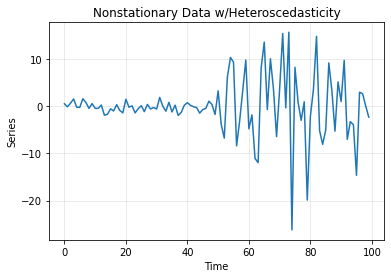

In [71]:
run_ts_plot(time, heteroscedasticity, title = "Nonstationary Data w/Heteroscedasticity")

In [72]:
AdfAfter, PvalueAfter, UsedLag_, Nobs_, CriticalValues_, IceBest = adfuller(heteroscedasticity)
print(f'\nAdfAfter:{AdfAfter}\n\nP-Value_After:{PvalueAfter}\n\nCritical-Values:{CriticalValues_}')


AdfAfter:-4.360702598425062

P-Value_After:0.00034815020575015897

Critical-Values:{'1%': -3.5011373281819504, '5%': -2.8924800524857854, '10%': -2.5832749307479226}


Hmm, ADF is saying we reject the null that this series is nonstationary. However, the plot clearly shows that the variance is not constant with time. 

This is an important lesson: Plotting is a useful tool because some statistical tests like ADF have low power, meaning they either need lots and lots of data or they may incorrecly reject the null hypothesis when in fact the null is true. 

#### Log Transformation

We can apply a log transformation. However, we cannot take the log of nonpositive values. The way we can get around this is by adding a constant to all values to make them positive. 

Let's take a look. 

In [76]:
new_hetero = heteroscedasticity + 30

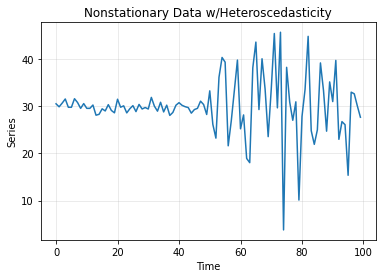

In [78]:
run_ts_plot(time, new_hetero,
            title='Nonstationary Data w/Heteroscedasticity')

In [79]:
Log_New_Hetero = np.log(new_hetero)

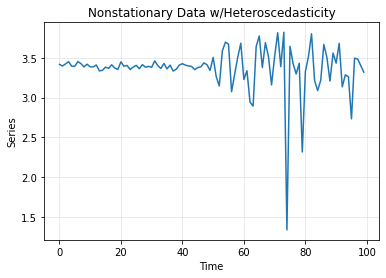

In [80]:
run_ts_plot(time, Log_New_Hetero,
            title='Nonstationary Data w/Heteroscedasticity')

Notice how the variance has collapsed to a large extent. 

Let's view the ADF test statistics again.

In [81]:
AdfAfter, PvalueAfter, UsedLag_, Nobs_, CriticalValues_, IceBest = adfuller(Log_New_Hetero)
print(f'\nAdfAfter:{AdfAfter}\n\nP-Value_After:{PvalueAfter}')


AdfAfter:-4.592801089891269

P-Value_After:0.00013317415791394847


### Example 3: Removing Autocorrelation with Differencing
Remember the *lagged* data? Turns out we can transform this series into stationary by applying what's called a differece. It's a fancy term that simply means you're going to subtract a past value from a current value. An example will make this clear.

We know *lagged* was created with a lag of one. So let's subtract $O_{t-1}$ from $O_{t}$ where $O_{t}$ is the observed data at time *t* and $O_{t-1}$ is the observed data at *t-1*.

In [86]:
difference = lagged[:-1] - lagged[1:]

In [88]:
pd.DataFrame({'Original':lagged[:-1], 'Shift':lagged[1:]})

,Original,Shift
0,-0.398427,-1.450040
1,-1.450040,-2.306826
2,-2.306826,-4.312520
3,-4.312520,-4.715734
4,-4.715734,-3.705607
...,...,...
94,12.290088,13.253382
95,13.253382,11.043738
96,11.043738,11.428051
97,11.428051,11.573573


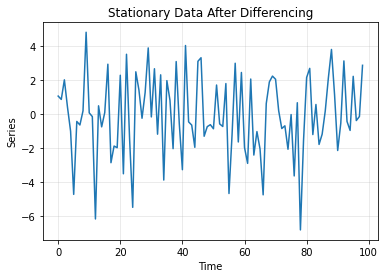

In [89]:
run_ts_plot(time[:-1], difference, title = 'Stationary Data After Differencing')

In [90]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(difference)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF:  -10.809982939729167
p-value:  1.9196947925176694e-19


In [95]:
dataset_SNS_1_log = np.log(dataset_SNS_1 + 25)

In [96]:
dataset_SNS_2_diff = dataset_SNS_2[:-1] - dataset_SNS_2[1:]

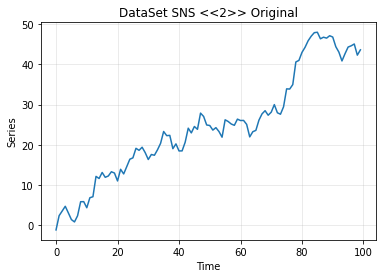

In [97]:
run_ts_plot(time, dataset_SNS_1, title = 'DataSet SNS <<1>> Original')
plt.show()
run_ts_plot(time, dataset_SNS_2, title = 'DataSet SNS <<2>> Original')
plt.show()

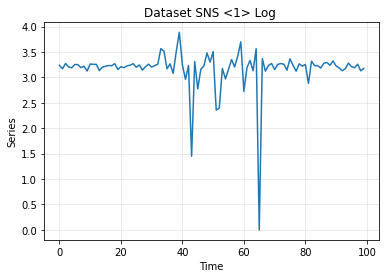

In [98]:
run_ts_plot(time[:-1], dataset_SNS_2_diff, title = 'Difference Dataset SNS <<2>>')
plt.show()
run_ts_plot(time, dataset_SNS_1_log, title = "Dataset SNS <1> Log ")
plt.show()

In [101]:
#Chunked Stats

chunk_logs = np.split(dataset_SNS_1_log, indices_or_sections=10)
print(f'\nChunk Logs\n\nMean:{np.mean(chunk_logs,axis=1)}\n\nVariance:{np.var(chunk_logs, axis=1)}')


Chunk Logs

Mean:[3.2122048  3.22276024 3.22014064 3.36950829 3.01519423 3.12475748
 2.89444899 3.23016944 3.22427585 3.1967811 ]

Variance:[0.00182641 0.00191978 0.00124754 0.05440107 0.30781792 0.17757266
 0.97585652 0.00491835 0.01462046 0.00221582]


In [104]:
chunk_diff = np.split(dataset_SNS_2_diff, indices_or_sections=9)
print(f'\nChunk Differenes\n\nMean:{np.mean(chunk_diff,axis=1)}\n\nVariance:{np.var(chunk_diff, axis=1)}')


Chunk Differenes

Mean:[-0.72869606 -0.53901512 -0.54678965 -0.38227396 -0.29692422  0.00731073
 -0.80460227 -1.052042    0.2654023 ]

Variance:[3.49814788 3.77394136 1.65346545 4.05400889 4.27486911 2.01011003
 2.74965891 2.99322188 2.53347512]


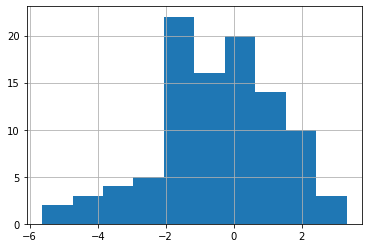

In [105]:
pd.Series(dataset_SNS_1_log).hist()
plt.show()
pd.Series(dataset_SNS_2_diff).hist()
plt.show()

In [106]:

# ADF tests
adf_1, pvalue_1, usedlag_, nobs_, critical_values_1, icbest_ = adfuller(dataset_SNS_1_log)
print("dataset_SNS_1")
print("ADF: ", adf_1)
print("p-value:", pvalue_1)
print("crit values: ", critical_values_1)

print()

adf_2, pvalue_2, usedlag_, nobs_, critical_values_2, icbest_ = adfuller(dataset_SNS_2_diff)
print("dataset_SNS_1")
print("ADF: ", adf_2)
print("p-value:", pvalue_2)
print("crit values: ", critical_values_2)

dataset_SNS_1
ADF:  -10.750411172845048
p-value: 2.6742889893621408e-19
crit values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}

dataset_SNS_1
ADF:  -10.280042396185916
p-value: 3.8006628429668026e-18
crit values:  {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}


Both are stationary 